<a href="https://colab.research.google.com/github/gimb99/gbgTPDI/blob/develop/ejercicioIntegrador/ejercicioIntegrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Integrador

## Import de librerias y dependencias

In [2]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

## Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

### Carga de imagen

In [3]:
!wget https://raw.githubusercontent.com/gimb99/gbgTPDI/refs/heads/develop/ejercicioIntegrador/sample1.jpg
idImage = "sample1.jpg"

--2025-04-21 01:23:35--  https://raw.githubusercontent.com/gimb99/gbgTPDI/refs/heads/develop/ejercicioIntegrador/sample1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256405 (250K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>] 250.40K  --.-KB/s    in 0.04s   

2025-04-21 01:23:35 (6.92 MB/s) - ‘sample1.jpg’ saved [256405/256405]



In [5]:
imagenCrudo = cv2.imread(idImage)
#Validar si cargo bien
if imagenCrudo is None:
    raise ValueError("La imagen no se pudo cargar. Asegúrate de que la ruta es correcta.")

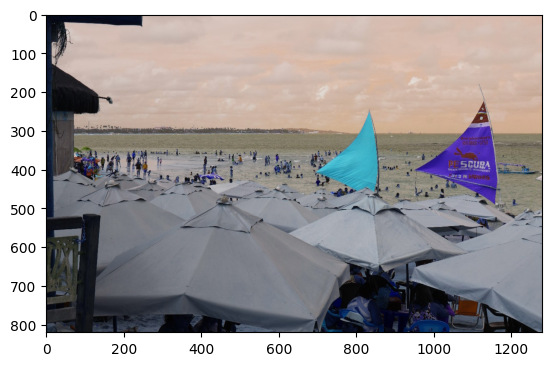

In [6]:
plt.imshow(imagenCrudo)
plt.show()

#### Pre-procesamiento a RGB

La razon por la que el defecto de display es BGR tiene que ver con un factor historico en la que los manipuladores de fotografias (y proveedores de software) usaban este formato como estandar de la industria, y el formato en si ya esta tomado como default por ser de una historia de codigo que dispone de antiguedad.

Hoy por hoy, las librerias como matplot esperan los canales en orden RGB, de forma que si no procesamos la imagen, no se vera con los valores correctos y por tanto tendra los colores alterados

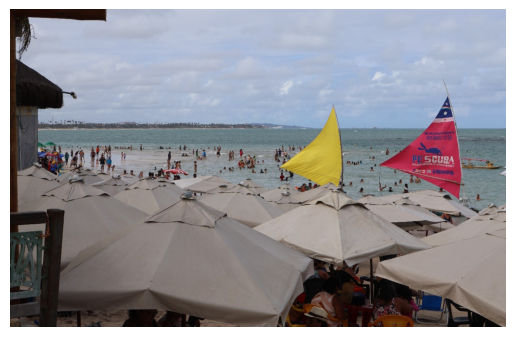

In [7]:
imagen = cv2.cvtColor(imagenCrudo, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(imagen)

### Valores de canales BGR

Dada la estructura tomada por cv2, esta es almacenada como una matriz que puede ser separada por los 3 canales previamente mencionados. Obtenemos estos valores separados para asi poder tomar la intensidad de colores pixel por pixel de la imagen.

In [8]:
b_channel, g_channel, r_channel = cv2.split(imagenCrudo)

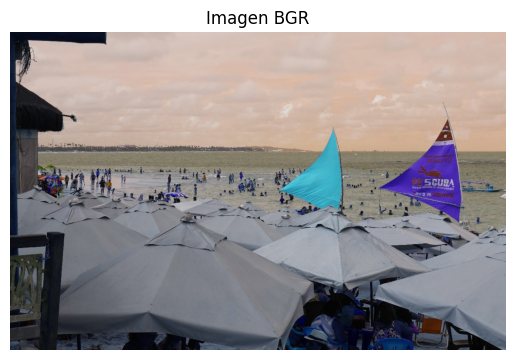

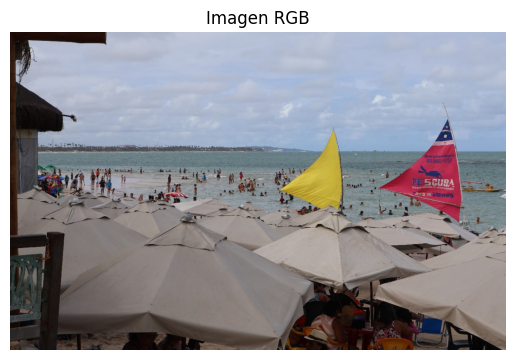

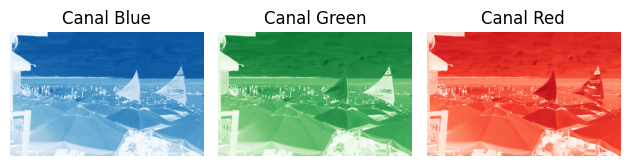

In [27]:
#plt.figure(figsize=(15, 15))

plt.imshow(imagenCrudo)
plt.title('Imagen BGR')
plt.axis('off')
plt.show()

plt.imshow(imagen)
plt.title('Imagen RGB')
plt.axis('off')
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(b_channel, cmap='Blues') # , cmap='gray'
plt.title('Canal Blue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g_channel, cmap='Greens') # , cmap='gray'
plt.title('Canal Green')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(r_channel, cmap='Reds') # , cmap='gray'
plt.title('Canal Red')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Get valores de canales inicial

Una forma de interpretar "mayor información" es comparar la intensidad promedio (o mean) de los valores de píxel en cada canal.

En este contexto, intuimos que un mayor promedio podría indicar mayor intensidad general en ese canal.

In [28]:
promedio_blue = np.mean(b_channel)
promedio_green = np.mean(g_channel)
promedio_red = np.mean(r_channel)

# Redondeo con 2 decimales para evitar numeros altos
print(f"Promedio Blue: {promedio_blue:.2f}")
print(f"Promedio Green: {promedio_green:.2f}")
print(f"Promedio Red: {promedio_red:.2f}")

Promedio Blue: 137.66
Promedio Green: 131.72
Promedio Red: 133.19


Estos valores son elevados dado que no se ha hecho un recorte de imagen para tener un sample mas acotado, probemos realizando un recorte hacia el sector de los dos banderines.

#### Recorte de imagen

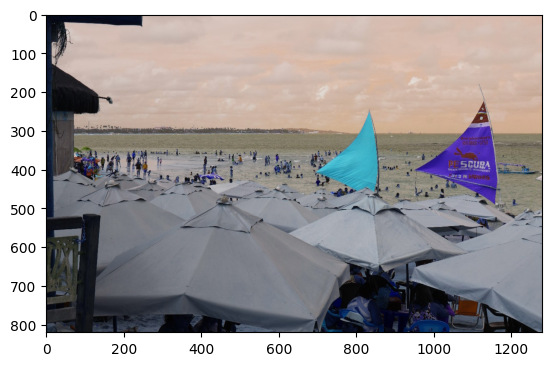

In [30]:
plt.imshow(imagenCrudo)
plt.axis('on')
plt.show()

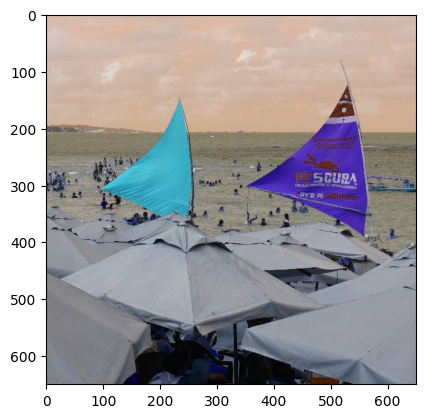

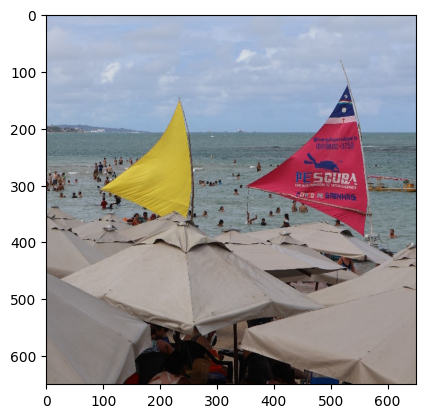

In [42]:
# Primero alto, despues ancho
imgCrudoNew = imagenCrudo[100:750, 600:1250]
plt.imshow(imgCrudoNew)
plt.show()

imgNew = cv2.cvtColor(imgCrudoNew, cv2.COLOR_BGR2RGB)
plt.imshow(imgNew)
plt.show()

#### Validacion de valores de canales post-recorte

In [39]:
r_channel, g_channel, b_channel = cv2.split(imgNew)

In [43]:
promedio_blue = np.mean(b_channel)
promedio_green = np.mean(g_channel)
promedio_red = np.mean(r_channel)

# Redondeo con 2 decimales para evitar numeros altos
print(f"Promedio Blue: {promedio_blue:.2f}")
print(f"Promedio Green: {promedio_green:.2f}")
print(f"Promedio Red: {promedio_red:.2f}")

max_promedio = max(promedio_blue, promedio_green, promedio_red)
if max_promedio == promedio_blue:
    canal_mayor = "Blue"
elif max_promedio == promedio_green:
    canal_mayor = "Green"
else:
    canal_mayor = "Red"

print(f"\nEl canal con mayor información (mayor valor promedio) es: {canal_mayor}")

Promedio Blue: 145.58
Promedio Green: 140.61
Promedio Red: 143.60

El canal con mayor información (mayor valor promedio) es: Blue


A pesar del recorte, no se ha logrado superar el promedio del canal Blue, pero los valores parecen igual de equilibrados entre canales.

## Ejercicio 2: Muestreo y Cuantización